# Course 2 (Exploratory Data Analysis) - Final Project
# Sumukha R

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset and converting pickup and dropoff columns into datetime

df = pd.read_csv("nyc_taxi_trip_duration.csv", parse_dates=["pickup_datetime", "dropoff_datetime"])
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447


In [3]:
# Shape and data types

df.shape, df.dtypes

((729322, 11),
 id                            object
 vendor_id                      int64
 pickup_datetime       datetime64[ns]
 dropoff_datetime      datetime64[ns]
 passenger_count                int64
 pickup_longitude             float64
 pickup_latitude              float64
 dropoff_longitude            float64
 dropoff_latitude             float64
 store_and_fwd_flag            object
 trip_duration                  int64
 dtype: object)

In [4]:
# Checking for null values in the dataset

df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

# Exploratory Data Analysis
## Univariate Data Analysis

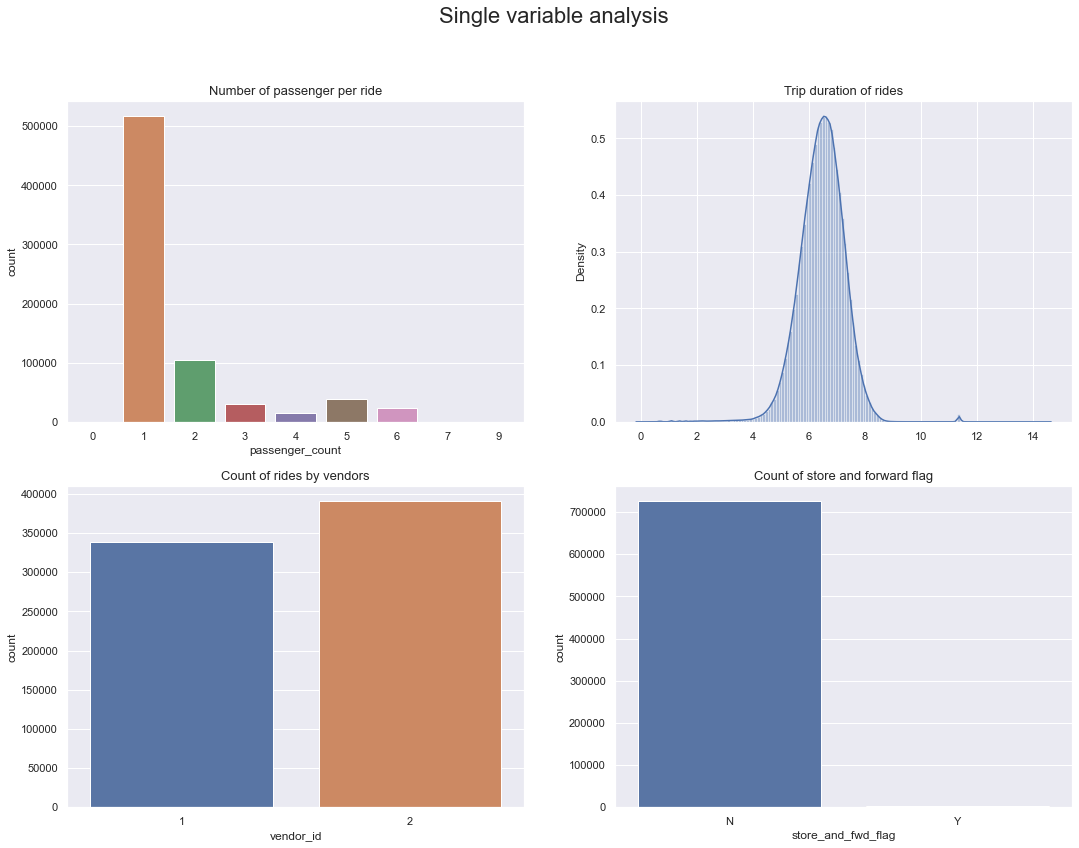

exp(5): 2.47355265170961 minutes
exp(8): 49.68263311736214 minutes


In [5]:
# Plots for single variable

fig, ax = plt.subplots(2, 2, figsize=(18, 13))
fig.suptitle("Single variable analysis", size=22)

p1 = sns.countplot(df.passenger_count, ax=ax[0, 0])
p1.set_title("Number of passenger per ride", size=13)

p2 = sns.distplot(np.log(df.trip_duration.values), ax=ax[0, 1], bins=150)
p2.set_title("Trip duration of rides", size=13)

p3 = sns.countplot(df.vendor_id, ax=ax[1, 0])
p3.set_title("Count of rides by vendors", size=13)

p4 = sns.countplot(df.store_and_fwd_flag, ax=ax[1, 1])
p4.set_title("Count of store and forward flag", size=13)

plt.show()

print(f"exp(5): {math.exp(5)/60} minutes\nexp(8): {math.exp(8)/60} minutes")

From the above plots,            
1. Most of the rides are with 1 passenger followed by 2 and 5. Others are very small.
2. Most of the trips are in the range (2.5, 50) minutes. There are some rides as low as 1 second and as high as 22 hours.
3. Number of rides hosted by vender 2 is more than vendor 1.
4. Most of the taxis do not have the store and forward flag.

In [6]:
# Extracting datetime columns

df["day_of_month"] = df["pickup_datetime"].dt.day
df["week_of_month"] = df["pickup_datetime"].dt.week
df["week_of_day"] = df["pickup_datetime"].dt.weekday
df["hour_of_day"] = df["pickup_datetime"].dt.hour

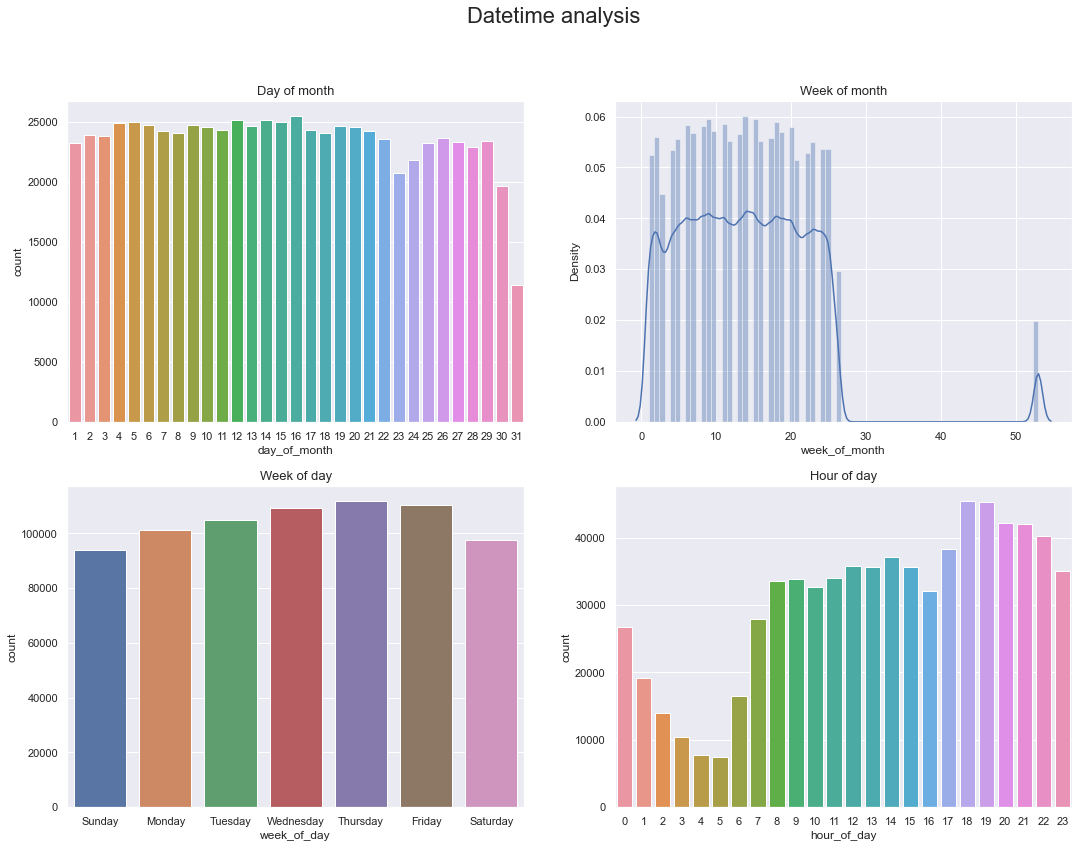

In [7]:
# Plots for datetime analysis

fig, ax = plt.subplots(2, 2, figsize=(18, 13))
fig.suptitle("Datetime analysis", size=22)

p1 = sns.countplot(df.day_of_month, ax=ax[0, 0])
p1.set_title("Day of month", size=13)

p2 = sns.distplot(df.week_of_month, ax=ax[0, 1], bins=75)
p2.set_title("Week of month", size=13)

p3 = sns.countplot(df.week_of_day, ax=ax[1, 0])
p3.set_title("Week of day", size=13)
p3.set_xticklabels(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

p4 = sns.countplot(df.hour_of_day, ax=ax[1, 1])
p4.set_title("Hour of day", size=13)

plt.show()

From the above plots, 
1. Number of rides are fairly distributed on all days of the month except for last 2 days of the month.
2. Number of rides are high during the first 30 weeks of the year and the last week and later becomes almost 0 (positively skewed).
3. The number of pickups are mostly on Wednesday, Thursay and Friday whereas pickup on other days are average.
4. Pickups peak during (16-22) hours, moderate during (8-15) hours and are fairly low during midnight (23-7) hours.

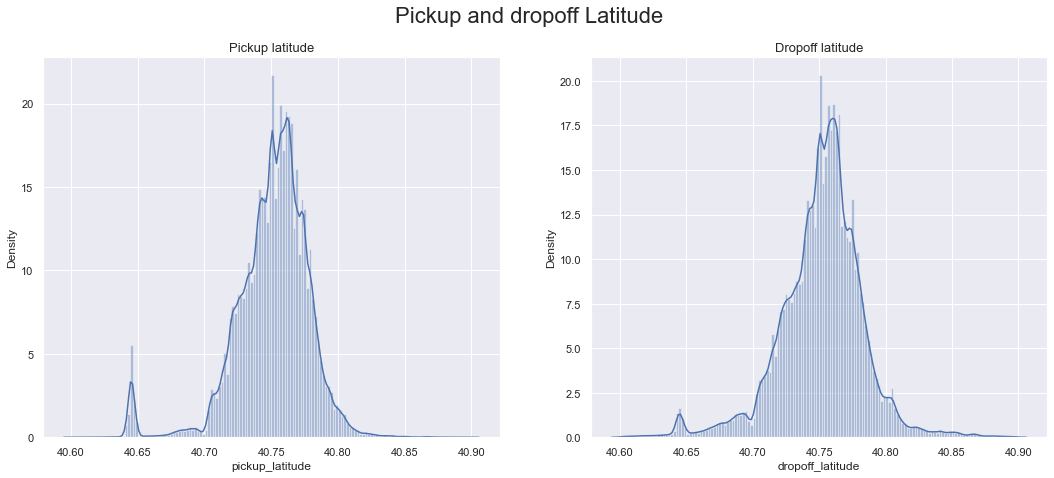

In [8]:
# Plots for latitude

fig, ax = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle("Pickup and dropoff Latitude", size=22)

p1 = sns.distplot(df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)].pickup_latitude, ax=ax[0], bins=150)
p1.set_title("Pickup latitude", size=13)

p2 = sns.distplot(df.loc[(df.dropoff_latitude > 40.6) & (df.dropoff_latitude < 40.9)].dropoff_latitude, ax=ax[1], bins=150)
p2.set_title("Dropoff latitude", size=13)

plt.show()

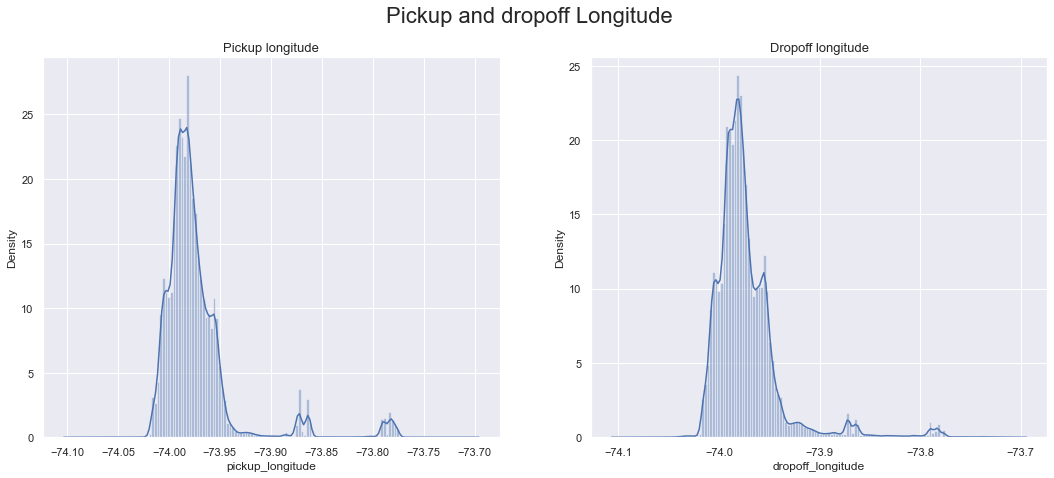

In [9]:
# Plots for longitude

fig, ax = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle("Pickup and dropoff Longitude", size=22)

p1 = sns.distplot(df.loc[(df.pickup_longitude > -74.1) & (df.pickup_longitude < -73.7)].pickup_longitude, ax=ax[0], bins=150)
p1.set_title("Pickup longitude", size=13)

p2 = sns.distplot(df.loc[(df.dropoff_longitude > -74.1) & (df.dropoff_longitude < -73.7)].dropoff_longitude, ax=ax[1], bins=150)
p2.set_title("Dropoff longitude", size=13)

plt.show()

## Bivariate Data Analysis 

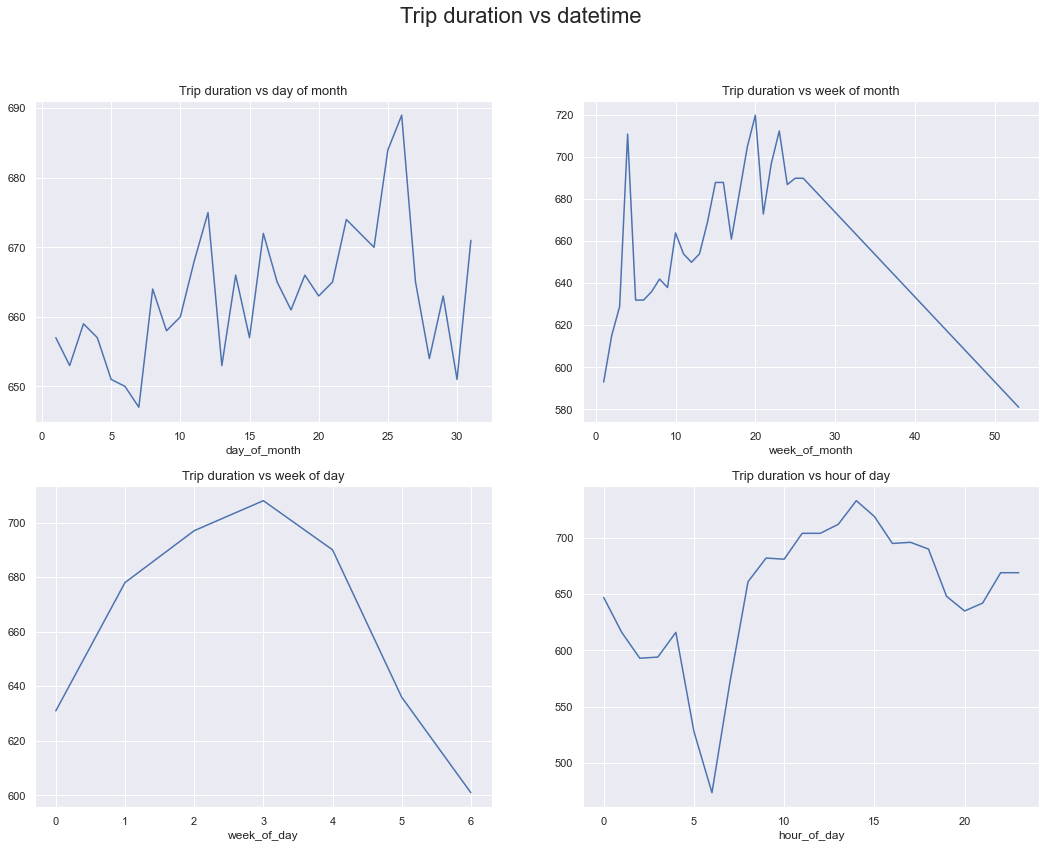

In [10]:
# Trip duration and datetime variables

fig, ax = plt.subplots(2, 2, figsize=(18, 13))
fig.suptitle("Trip duration vs datetime", size=22)

p1 = sns.lineplot(df.groupby(["day_of_month"])["trip_duration"].median().index, 
             df.groupby(["day_of_month"])["trip_duration"].median().values, ax=ax[0, 0])
p1.set_title("Trip duration vs day of month", size=13)

p2 = sns.lineplot(df.groupby(["week_of_month"])["trip_duration"].median().index, 
             df.groupby(["week_of_month"])["trip_duration"].median().values, ax=ax[0, 1])
p2.set_title("Trip duration vs week of month", size=13)

p3 = sns.lineplot(df.groupby(["week_of_day"])["trip_duration"].median().index, 
             df.groupby(["week_of_day"])["trip_duration"].median().values, ax=ax[1, 0])
p3.set_title("Trip duration vs week of day", size=13)

p4 = sns.lineplot(df.groupby(["hour_of_day"])["trip_duration"].median().index, 
             df.groupby(["hour_of_day"])["trip_duration"].median().values, ax=ax[1, 1])
p4.set_title("Trip duration vs hour of day", size=13)

plt.show()

From the above plots,
1. Trip duration peaks in a month during some days of its prefinal week (22-25) and moderate during some initial days (10-12).
2. Trip duration peaks during the inital and mid-year (2-4, 20-25) weeks.
3. Trip duration is maximum on wednesday and Tuesday followed by Thursday and Monday.
4. Trip duration is maximum during (10-18) hours and least during night (0-7).

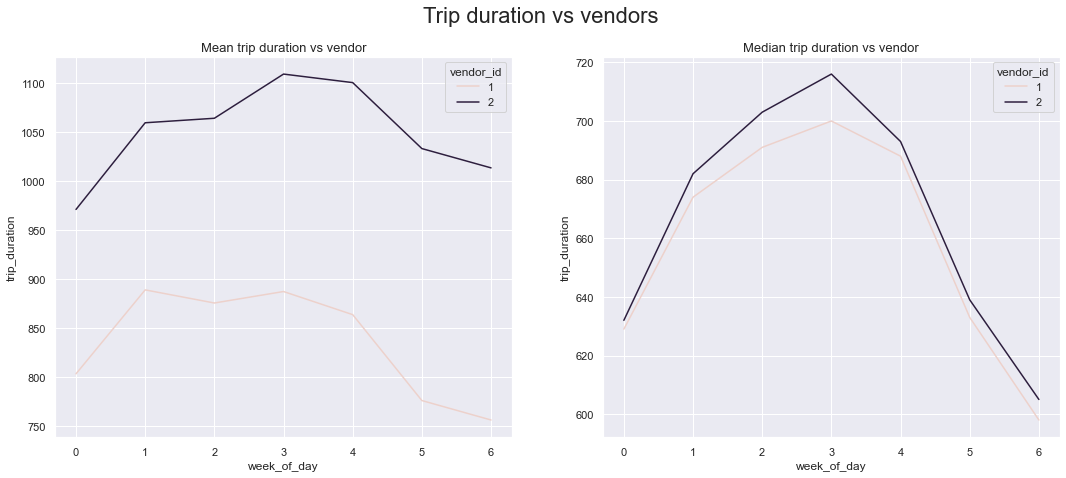

In [11]:
# Trip duration and vendors

fig, ax = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle("Trip duration vs vendors", size=22)

df1 = df.groupby(["vendor_id", "week_of_day"])["trip_duration"].mean().reset_index()
p1 = sns.lineplot(df1.week_of_day, df1.trip_duration, hue=df1.vendor_id, ax=ax[0])
p1.set_title("Mean trip duration vs vendor", size=13)

df1 = df.groupby(["vendor_id", "week_of_day"])["trip_duration"].median().reset_index()
p2 = sns.lineplot(df1.week_of_day, df1.trip_duration, hue=df1.vendor_id, ax=ax[1])
p2.set_title("Median trip duration vs vendor", size=13)

plt.show()

From the above plot,           
Even though the mean trip duration of both vendors is same, the mean of vendor 2 is higher hence rides by vendor 2 is higher than vendor 1.

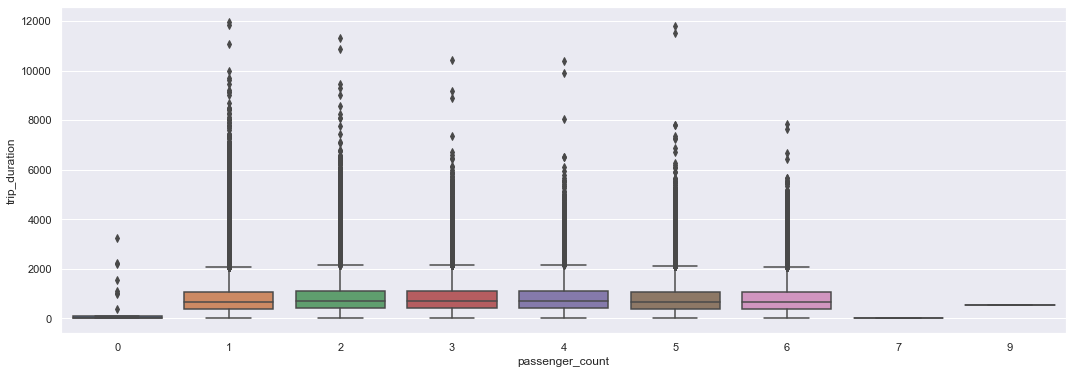

In [12]:
# Trip duration vs passenger count

plt.figure(figsize=(18, 6))
sns.boxplot(df[df["trip_duration"] < 12000]["passenger_count"], df[df["trip_duration"] < 12000]["trip_duration"])
plt.show()

From the above plot,            
There are no notable differences in trip duration for different number of passengers.

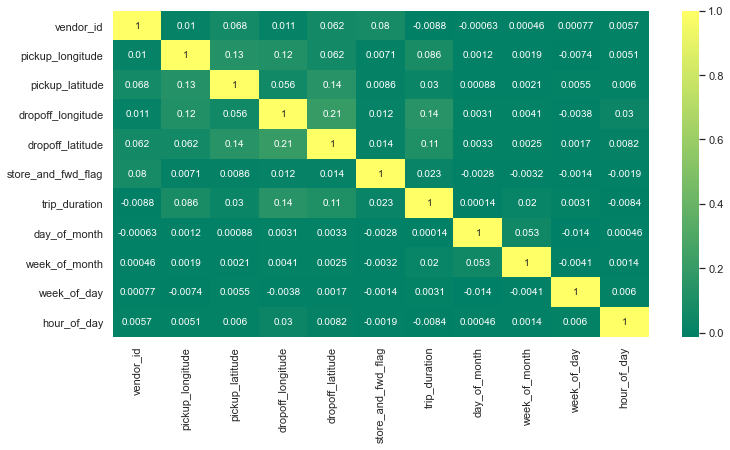

In [13]:
# Heatmap for the dataset

plt.figure(figsize=(12, 6))
df1 = df.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count'], axis=1)
df1 = df1.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(df1, cmap="summer", annot=True)

plt.show()

# Multivariate Analysis 

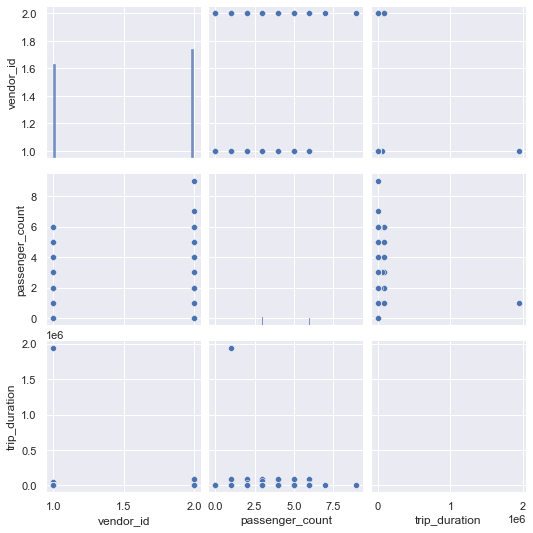

In [14]:
# Pairplot

df1 = df.drop(columns=["id", "day_of_month", "week_of_month", "week_of_day", "hour_of_day", "pickup_longitude",
                      "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "store_and_fwd_flag"])


sns.pairplot(df1)

# Insights
1. Most of the rides are with 1 passenger followed by 2 and 5. Others are very small.
2. Most of the trips are in the range (2.5, 50) minutes. There are some rides as low as 1 second and as high as 22 hours.
3. Number of rides hosted by vender 2 is more than vendor 1.
4. The number of pickups are mostly on Wednesday, Thursay and Friday whereas pickup on other days are average.
5. Pickups peak during (16-22) hours, moderate during (8-15) hours and are fairly low during midnight (23-7) hours.
6. Trip duration is maximum on wednesday and Tuesday followed by Thursday and Monday.
7. Trip duration is maximum during (10-18) hours and least during night (0-7).
8. Even though the mean trip duration of both vendors is same, the mean of vendor 2 is higher hence rides by vendor 2 is higher than vendor 1.
9. There are no notable differences in trip duration for different number of passengers.
10. From the pairplot, the above same inferences can be made.
10. From the heatmap, the lattitude and longitude features have highest correlation with the target in comparision with the other features. 